**Regression and Its Types**

*   **Implement simple linear regression using a dataset.**
*   **Explore and interpret the regression model coefficients and goodness-of-fit measures.**
*   **Extend the analysis to multiple linear regression and assess the impact of
additional predictors.**

**1. LINEAR REGRESSION**

Dataset Head:
  Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0                  

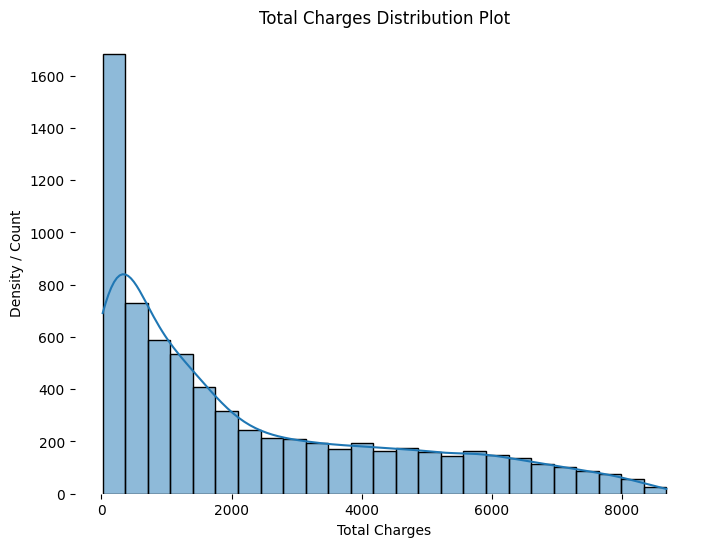

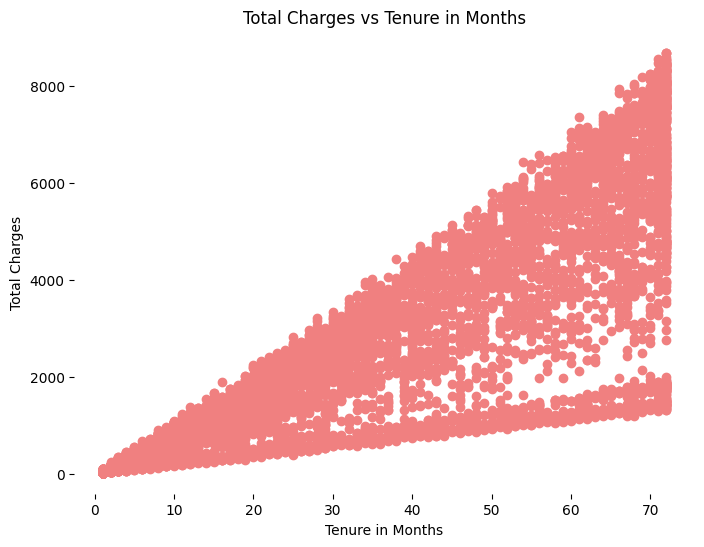

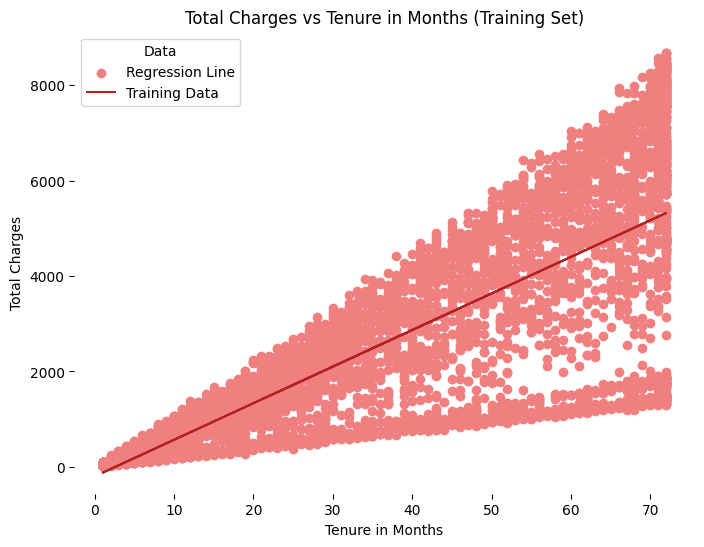

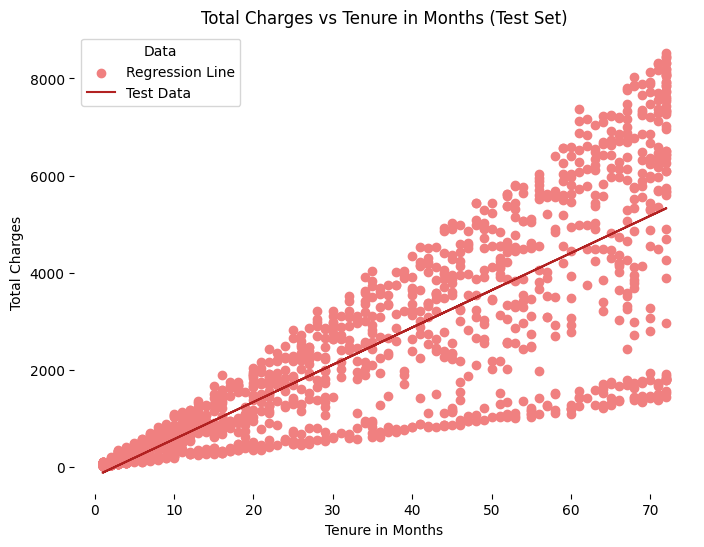


--- Model Coefficients and Intercept ---
Coefficient (Slope, m): 76.7204
Intercept (c): -199.6998
Linear Equation: Total Charges = 76.7204 * Tenure in Months + -199.6998


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the telco dataset
df_telco = pd.read_csv('/content/telco.csv')
print("Dataset Head:")
print(df_telco.head())
print("\nDataset Info:")
print(df_telco.info())
print("\nDataset Description:")
print(df_telco.describe())
print("\nDataset Columns:")
print(df_telco.columns)
print("\nDataset Shape:")
print(df_telco.shape)

# --- Data analysis ---

# Describe data
print("\n--- Data Description for Selected Variables ---")
print(df_telco[['Tenure in Months', 'Total Charges']].describe())

# --- Data Distribution Plot ---

# Data distribution for 'Total Charges'
plt.figure(figsize=(8, 6))
plt.title('Total Charges Distribution Plot')
sns.histplot(df_telco['Total Charges'], kde=True)
plt.xlabel('Total Charges')
plt.ylabel('Density / Count')
plt.box(False)
plt.savefig('total_charges_distribution.png')
plt.show()

# --- check the relationship between Total Charges and Tenure in Months ---

# Relationship between Total Charges and Tenure in Months
plt.figure(figsize=(8, 6))
plt.scatter(df_telco['Tenure in Months'], df_telco['Total Charges'], color = 'lightcoral')
plt.title('Total Charges vs Tenure in Months')
plt.xlabel('Tenure in Months')
plt.ylabel('Total Charges')
plt.box(False)
plt.savefig('tenure_vs_total_charges_scatter.png')
plt.show()

# --- Split the dataset into dependent/independent variables ---
# Tenure in Months (X) is the independent variable
# Total Charges (y) is dependent on Tenure in Months

# Splitting variables
X = df_telco[['Tenure in Months']]  # independent
y = df_telco[['Total Charges']]  # dependent

# --- Split data into Train/Test sets ---
# Splitting dataset into test/train (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# --- Train the regression model ---

# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# --- Predict the result ---

# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)  # predicted value of y_train

# --- Plot the training and test results ---

# Plot training set data vs predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Total Charges vs Tenure in Months (Training Set)')
plt.xlabel('Tenure in Months')
plt.ylabel('Total Charges')
plt.legend(['Regression Line', 'Training Data'], title = 'Data', loc='best', facecolor='white')
plt.box(False)
plt.savefig('training_set_predictions.png')
plt.show()

# Plot test set data vs predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color = 'lightcoral')
# Use the same trained line for the test set plot:
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Total Charges vs Tenure in Months (Test Set)')
plt.xlabel('Tenure in Months')
plt.ylabel('Total Charges')
plt.legend(['Regression Line', 'Test Data'], title = 'Data', loc='best', facecolor='white')
plt.box(False)
plt.savefig('test_set_predictions.png')
plt.show()

# --- Regressor coefficients and intercept ---
print("\n--- Model Coefficients and Intercept ---")
print(f'Coefficient (Slope, m): {regressor.coef_[0][0]:.4f}')
print(f'Intercept (c): {regressor.intercept_[0]:.4f}')
print(f'Linear Equation: Total Charges = {regressor.coef_[0][0]:.4f} * Tenure in Months + {regressor.intercept_[0]:.4f}')

**2. MULTIPLE REGREESSION**

Dataset Head:
  Customer ID  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0                  

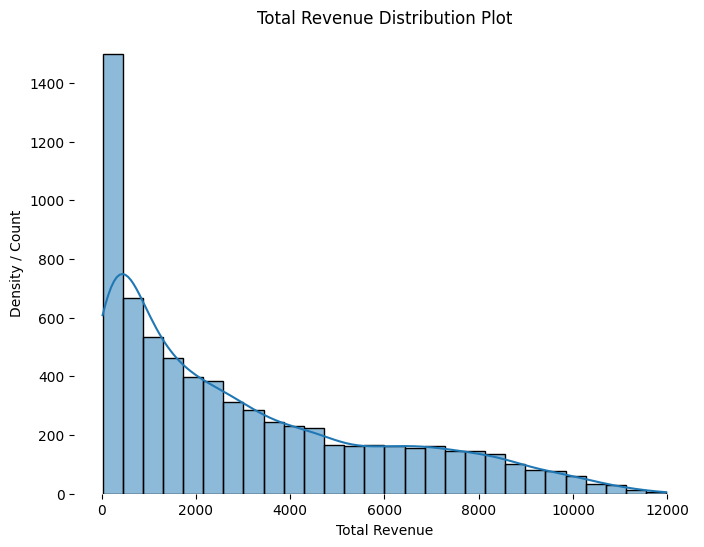

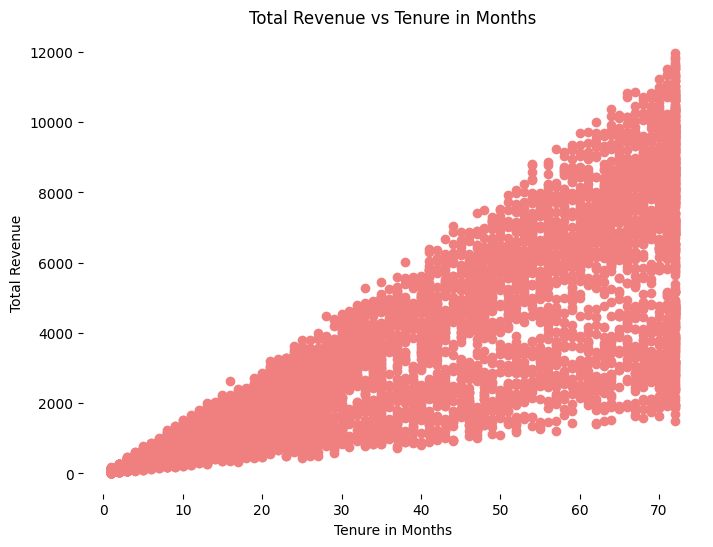

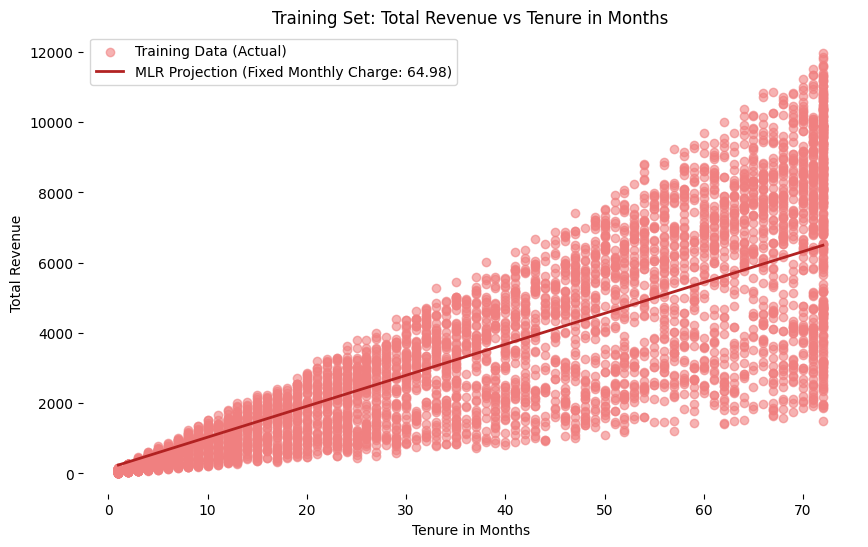

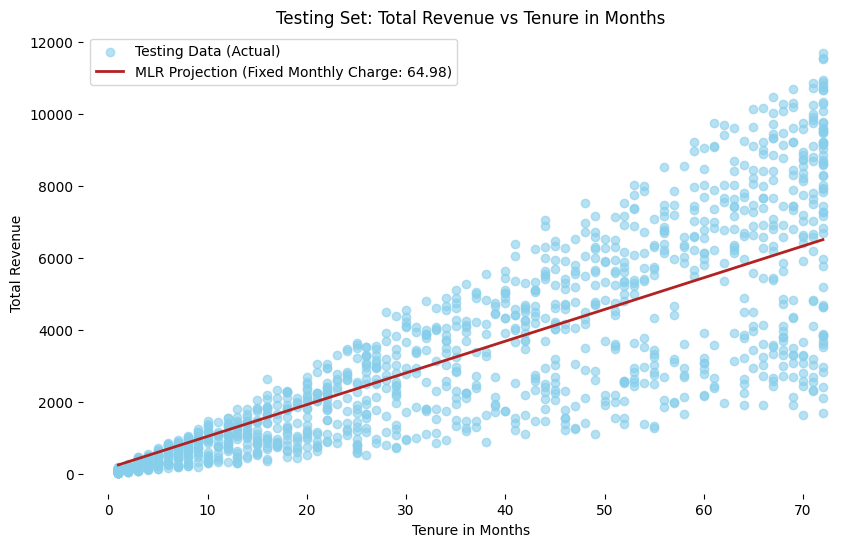


--- Predicted vs Actual Total Revenue (Test Set) ---
[[5604.29 5388.04]
 [4148.33 3442.6 ]
 [-472.84  485.8 ]
 ...
 [4211.65 4489.6 ]
 [-130.33  154.44]
 [4473.04 5333.04]]

--- Model Coefficients and Intercept ---
Intercept (c): -2327.1118
Coefficients (m):
  Contract_One Year: 179.5598
  Contract_Two Year: -9.6549
  Tenure in Months: 88.1155
  Monthly Charge: 38.1660

--- 2D Projection Line Equation ---
Total Revenue = 88.1155 * Tenure in Months + 152.8485


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Load the telco dataset
df_telco = pd.read_csv('telco.csv')

# --- Initial Data Exploration ---
print("Dataset Head:")
print(df_telco.head())
print("\nDataset Info:")
df_telco.info()
print("\nDataset Description:")
print(df_telco.describe())
print("\nDataset Columns:")
print(df_telco.columns)
print("\nDataset Shape:")
print(df_telco.shape)

# --- Select relevant columns for MLR ---
# Independent Variables (X): Tenure in Months (Num), Monthly Charge (Num), Contract (Cat)
# Dependent Variable (y): Total Revenue (Num)
X_cols = ['Tenure in Months', 'Monthly Charge', 'Contract']
y_col = 'Total Revenue'
df_mlr = df_telco[X_cols + [y_col]].copy()

# --- Data analysis and Plotting (Initial) ---

# Describe data
print("\n--- Data Description for Selected Variables ---")
print(df_mlr.describe())

# Data Distribution (Total Revenue)
plt.figure(figsize=(8, 6))
plt.title('Total Revenue Distribution Plot')
sns.histplot(df_mlr['Total Revenue'], kde=True)
plt.xlabel('Total Revenue')
plt.ylabel('Density / Count')
plt.box(False)
plt.savefig('total_revenue_distribution.png')
plt.show()

# Relationship (Total Revenue vs Tenure in Months)
plt.figure(figsize=(8, 6))
plt.scatter(df_mlr['Tenure in Months'], df_mlr['Total Revenue'], color = 'lightcoral')
plt.title('Total Revenue vs Tenure in Months')
plt.xlabel('Tenure in Months')
plt.ylabel('Total Revenue')
plt.box(False)
plt.savefig('revenue_vs_tenure_scatter.png')
plt.show()

# --- Split raw data for plotting and mean calculation ---
X_raw = df_mlr.iloc[:, :-1]
y_raw = df_mlr.iloc[:, -1]
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y_raw, test_size = 0.2, random_state = 0)

# Calculate mean of Monthly Charge in the training set (used for 2D plot projection)
mean_monthly_charge = X_train_raw['Monthly Charge'].mean()

# --- One-hot encoding and Model Training ---
X = X_raw.values
# Contract is the categorical column at index 2. Drop 'Month-to-Month'.
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [2])], remainder='passthrough')
X_encoded = np.array(ct.fit_transform(X))
X_train_encoded, X_test_encoded, _, _ = train_test_split(X_encoded, y_raw, test_size = 0.2, random_state = 0)

# Train model
regressor = LinearRegression()
regressor.fit(X_train_encoded, y_train)

# --- Extract coefficients for 2D Projection ---
# Indexing based on encoded X: [2] -> Tenure in Months, [3] -> Monthly Charge
beta_0 = regressor.intercept_
beta_tenure = regressor.coef_[2]
beta_charge = regressor.coef_[3]

# Calculate the constant part of the 2D projected line
line_intercept_2d = beta_0 + (beta_charge * mean_monthly_charge)
line_slope_2d = beta_tenure

# Generate line points for plotting
X_range = np.linspace(X_train_raw['Tenure in Months'].min(), X_train_raw['Tenure in Months'].max(), 100).reshape(-1, 1)
y_line = line_intercept_2d + (line_slope_2d * X_range)

# --- Plotting: Total Revenue vs Tenure in Months (Train Set) ---
plt.figure(figsize=(10, 6))
plt.scatter(X_train_raw['Tenure in Months'], y_train, color='lightcoral', alpha=0.6, label='Training Data (Actual)')
plt.plot(X_range, y_line, color='firebrick', linewidth=2, label=f'MLR Projection (Fixed Monthly Charge: {mean_monthly_charge:.2f})')
plt.title('Training Set: Total Revenue vs Tenure in Months')
plt.xlabel('Tenure in Months')
plt.ylabel('Total Revenue')
plt.legend()
plt.box(False)
plt.savefig('mlr_tenure_vs_revenue_training.png')
plt.show()

# --- Plotting: Total Revenue vs Tenure in Months (Test Set) ---
plt.figure(figsize=(10, 6))
plt.scatter(X_test_raw['Tenure in Months'], y_test, color='skyblue', alpha=0.6, label='Testing Data (Actual)')
plt.plot(X_range, y_line, color='firebrick', linewidth=2, label=f'MLR Projection (Fixed Monthly Charge: {mean_monthly_charge:.2f})')
plt.title('Testing Set: Total Revenue vs Tenure in Months')
plt.xlabel('Tenure in Months')
plt.ylabel('Total Revenue')
plt.legend()
plt.box(False)
plt.savefig('mlr_tenure_vs_revenue_testing.png')
plt.show()

# --- Predict results and Compare predictions (Test Set) ---
y_pred_test = regressor.predict(X_test_encoded)
np.set_printoptions(precision=2)
result = np.concatenate((y_pred_test.reshape(len(y_pred_test), 1), y_test.values.reshape(len(y_test), 1)), 1)
print("\n--- Predicted vs Actual Total Revenue (Test Set) ---")
print(result)

# Print coefficients
print("\n--- Model Coefficients and Intercept ---")
feature_names = ['Contract_One Year', 'Contract_Two Year', 'Tenure in Months', 'Monthly Charge']
print(f'Intercept (c): {regressor.intercept_:.4f}')
print(f'Coefficients (m):')
for name, coef in zip(feature_names, regressor.coef_):
    print(f'  {name}: {coef:.4f}')

print(f'\n--- 2D Projection Line Equation ---')
print(f'Total Revenue = {line_slope_2d:.4f} * Tenure in Months + {line_intercept_2d:.4f}')